In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [141]:
from sklearn.utils import resample

df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=4860,    
                                 random_state=123) 
 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 


In [98]:
data = df_upsampled

In [99]:
data[:10]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
255,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
256,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
257,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [100]:
data.drop('id', axis=1, inplace=True)

In [101]:
data.gender.value_counts()

Female    5626
Male      4094
Other        1
Name: gender, dtype: int64

In [102]:
data.drop(data[data['gender']=='Other'].index,inplace=True)

In [103]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
18,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1
149,Female,70.0,0,1,Yes,Private,Rural,239.07,26.1,never smoked,1
188,Male,82.0,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [104]:
data.smoking_status.value_counts()

never smoked       3576
Unknown            2392
formerly smoked    2186
smokes             1566
Name: smoking_status, dtype: int64

In [105]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  903
smoking_status         0
stroke                 0
dtype: int64

In [106]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,9720.000000,9720.000000,9720.000000,9720.000000,8817.000000,9720.000000
mean,54.858963,0.176543,0.118621,118.290812,29.621685,0.500000
std,22.243403,0.381301,0.323359,55.137961,7.290582,0.500026
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,41.000000,0.000000,0.000000,78.030000,24.800000,0.000000
50%,59.000000,0.000000,0.000000,96.590000,28.700000,0.500000
75%,74.000000,0.000000,0.000000,144.932500,33.400000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [107]:
data.gender.replace({'Male':1,'Female':0},inplace = True)
data.ever_married.replace({'Yes':1,'No':0},inplace = True)
data.Residence_type.replace({'Urban':1,'Rural':0},inplace = True)
data.work_type.replace({'Self-employed':'Self_employed'},inplace = True)


In [108]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,children,0,95.12,18.0,Unknown,0
250,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
251,0,8.0,0,0,0,Private,1,110.89,17.6,Unknown,0
252,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
253,1,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
18,0,60.0,0,0,0,Private,1,89.22,37.8,never smoked,1
149,0,70.0,0,1,1,Private,0,239.07,26.1,never smoked,1
188,1,82.0,0,0,1,Private,0,86.62,29.5,formerly smoked,1
247,1,71.0,1,0,1,Self_employed,0,87.80,NaN,Unknown,1


In [109]:
data = pd.get_dummies(data, columns = ['work_type','smoking_status'])

In [110]:
data


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,0,0
250,1,58.0,1,0,1,1,87.96,39.2,0,0,0,1,0,0,0,0,1,0
251,0,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,1,0,0,0
252,0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,0,1,0,0
253,1,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,60.0,0,0,0,1,89.22,37.8,1,0,0,1,0,0,0,0,1,0
149,0,70.0,0,1,1,0,239.07,26.1,1,0,0,1,0,0,0,0,1,0
188,1,82.0,0,0,1,0,86.62,29.5,1,0,0,1,0,0,0,1,0,0
247,1,71.0,1,0,1,0,87.80,NaN,1,0,0,0,1,0,1,0,0,0


In [111]:
cols = ['gender','age','hypertenstion','heart_disease','ever_marries','Residence_type','avg_glucose_level','bmi','stroke','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self_employed','work_type_children','smoking_status_Unknown','smoking_status_formerly_smoked','smoking_status_never_smoked','smoking_status_smokes']

In [112]:
data = data.fillna(value={'bmi': round(np.nanmean(data['bmi']), 1)})

In [113]:
data 

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,0,0
250,1,58.0,1,0,1,1,87.96,39.2,0,0,0,1,0,0,0,0,1,0
251,0,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,1,0,0,0
252,0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,0,1,0,0
253,1,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,60.0,0,0,0,1,89.22,37.8,1,0,0,1,0,0,0,0,1,0
149,0,70.0,0,1,1,0,239.07,26.1,1,0,0,1,0,0,0,0,1,0
188,1,82.0,0,0,1,0,86.62,29.5,1,0,0,1,0,0,0,1,0,0
247,1,71.0,1,0,1,0,87.80,29.6,1,0,0,0,1,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

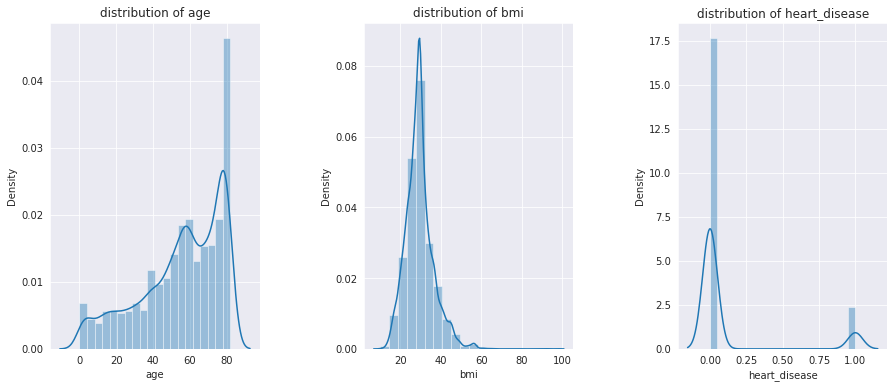

In [114]:
plt.figure(figsize=(15,6))
n = 0
for x in ['age','bmi','heart_disease']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
  sns.distplot(data[x],bins = 20)
  plt.title('distribution of {}'.format(x))

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score


In [116]:
y = data['stroke']
X = data.drop('stroke',axis = 1)

In [117]:
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,1,1,0,0,0
250,1,58.0,1,0,1,1,87.96,39.2,0,0,1,0,0,0,0,1,0
251,0,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,0
252,0,70.0,0,0,1,0,69.04,35.9,0,0,1,0,0,0,1,0,0
253,1,14.0,0,0,0,0,161.28,19.1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,60.0,0,0,0,1,89.22,37.8,0,0,1,0,0,0,0,1,0
149,0,70.0,0,1,1,0,239.07,26.1,0,0,1,0,0,0,0,1,0
188,1,82.0,0,0,1,0,86.62,29.5,0,0,1,0,0,0,1,0,0
247,1,71.0,1,0,1,0,87.80,29.6,0,0,0,1,0,1,0,0,0


In [118]:
y

249    0
250    0
251    0
252    0
253    0
      ..
18     1
149    1
188    1
247    1
238    1
Name: stroke, Length: 9720, dtype: int64

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

model_logistic_Regression = LogisticRegression()
y_pred = model_logistic_Regression.fit(X_train, y_train).predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


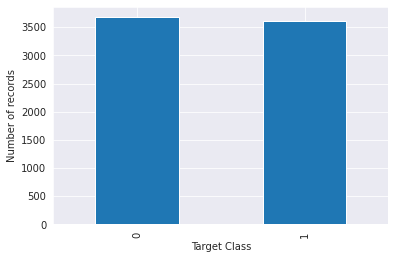

In [120]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [121]:
y_test[:10]

3205    0
69      1
234     1
70      1
54      1
75      1
4702    0
233     1
28      1
886     0
Name: stroke, dtype: int64

In [122]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.78796047 0.76613516]
recall: [0.74008439 0.81044177]
fscore: [0.76327241 0.78766589]
support: [1185 1245]


In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7290, 17)
(2430, 17)
(7290,)
(2430,)


In [124]:
score = {}
pipe = make_pipeline(StandardScaler(),LogisticRegression())
pipe.fit(X_train,y_train)
score['logistic_Regression'] = pipe.score(X_test,y_test)

pipe = make_pipeline(StandardScaler(),KNeighborsClassifier())
pipe.fit(X_train,y_train)
score['KNN'] = pipe.score(X_test,y_test)

pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe.fit(X_train,y_train)
score['RandomForest'] = pipe.score(X_test,y_test)

pipe = make_pipeline(StandardScaler(),XGBClassifier())
pipe.fit(X_train,y_train)
score['XGB'] = pipe.score(X_test,y_test)

In [125]:
score

{'KNN': 0.9296296296296296,
 'RandomForest': 0.988477366255144,
 'XGB': 0.8555555555555555,
 'logistic_Regression': 0.7777777777777778}

In [126]:
model_logistic_Regression = LogisticRegression()
model_logistic_Regression.fit(X_train,y_train)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train,y_train)

model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train,y_train)

model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGBClassifier()

In [127]:
import pickle

# saving
with open('LogisticRegression.pickle', 'wb') as handle:
    pickle.dump(model_logistic_Regression, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('KNN.pickle', 'wb') as handle:
    pickle.dump(model_KNN, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('RandomForest.pickle', 'wb') as handle:
    pickle.dump(model_RandomForest, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('XGB.pickle', 'wb') as handle:
    pickle.dump(model_XGB, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [128]:
loaded_model_logistic_Regression = pickle.load(open('LogisticRegression.pickle', 'rb'))
loaded_model_KNN = pickle.load(open('KNN.pickle', 'rb'))
loaded_model_RandomForest = pickle.load(open('RandomForest.pickle', 'rb'))
loaded_model_XGB = pickle.load(open('XGB.pickle', 'rb'))


result_model_logistic_Regression = loaded_model_logistic_Regression.score(X_test, y_test)
result_model_KNN = loaded_model_KNN.score(X_test, y_test)
result_model_RandomForest = loaded_model_RandomForest.score(X_test, y_test)
result_model_XGB = loaded_model_XGB.score(X_test, y_test)


print(result_model_logistic_Regression)
print(result_model_KNN)
print(result_model_RandomForest)
print(result_model_XGB)

0.7761316872427984
0.9337448559670782
0.988477366255144
0.8555555555555555


In [129]:
loaded_model_logistic_Regression.predict([[0,16,0,0,0,1,102,27,0,1,0,0,0,0,0,1,0]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [130]:
loaded_model_KNN.predict([[0,16,0,0,0,1,102,27,0,1,0,0,0,0,0,1,0]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0

In [131]:
loaded_model_RandomForest.predict([[1,67,0,1,1,1,228,36,0,0,1,0,0,0,1,0,0]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [132]:
dataTest = [[1,67,0,1,1,1,228,36,0,0,1,0,0,0,1,0,0]]

In [133]:
D = pd.DataFrame(dataTest)

In [134]:
D.columns = ['gender','age','hypertenstion','heart_disease','ever_marries','Residence_type','avg_glucose_level','bmi','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self_employed','work_type_children','smoking_status_Unknown','smoking_status_formerly_smoked','smoking_status_never_smoked','smoking_status_smokes']


In [135]:
D

,gender,age,hypertenstion,heart_disease,ever_marries,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1,67,0,1,1,1,228,36,0,0,1,0,0,0,1,0,0


In [136]:
def predict_data(data_input):
    D = pd.DataFrame(data_input)
    result = loaded_model_RandomForest.predict(D)[0]
    return result
    

In [137]:
predict_data([[1,67,0,0,0,0,228,36,0,0,1,0,0,0,1,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0

In [138]:
predict_data([[0,67,0,1,1,1,228,36,0,0,1,0,0,0,1,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1